# Pràctica 2: Neteja i anàlisis de les dades

El següent notebook esta orientat a resoldre la pràctica 2 de l'assignatura *M2.951 - Tipologia i cicle de vida de les dades* del màster en Data Science de la UOC.

### Nota important

Per poder executar el notebook, es necessari la descàrrega dels fitxers *csv* que conforman el dataset de la pràctica: GlobalTemperatures, GlobalLandTemperaturesByCountry i GlobalLandTemperaturesByCity, i situarlos dins la carpeta **data/** del projecte de github. La raó per la qual no es troben actualment en el projecte de github es el tamany, ja que alguns d'aquests fitxers superen els *25MB* d'espai i Github no permet la seva  càrrega.

### Llibreries

In [1]:
import numpy as np
import pandas as pd
import warnings
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

# Descripció del dataset

El dataset utilitzat per realitzar aquesta practica tracta sobre el canvi climàtic en les temperatures de l'aire a la superficie de la Terra, es pot trobar a partir del següent enllaç: [**climate-change-earth-surface-temperature-data**](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data).
Aquest dataset d'ús public a traves de la plataforma Kaggle, consta de la licencia *CC BY-NC-SA 4.0*. 

És tracta d'un dataset que conté registres de dades des de l'any 1750 fins al 2015 sobre la temperatura de l'aire a la superficie mesurada en diferents punts de la Terra.

En aquesta pràctica es vol plantejar l'estudi de l'evolució de la temperatura en la superficíe terrestre, per compendre si es cert que hi ha hagut un augment de les temperatures en els ultims anys, i consequentment confirmar que el canvi climatic referent a la temperatura terrestre es real. 

El dataset constà de 4 fitxers de dades en format *csv*:


- GlobalTemperatures.csv
- GlobalLandTemperaturesByCountry.csv
- GlobalLandTemperaturesByState.csv
- GlobalLandTemperaturesByMajorCity.csv
- GlobalLandTemperaturesByCity.csv

Per al cas d'estudi plantejat en aquesta pràctica, utilitzarem les dades dels fitxers *GlobalTemperatures*, *GlobalLandTemperaturesByCountry* i *GlobalLandTemperaturesByCity*.

A continuació es detalla la informació que contenen cadascún d'aquests datasets, però primer, es llegirant aquests fitxers per poder obtindre un millor resum.

In [2]:
global_temp=pd.read_csv('../data/GlobalTemperatures.csv')
countries_temp=pd.read_csv('../data/GlobalLandTemperaturesByCountry.csv')
cities_temp=pd.read_csv('../data/GlobalLandTemperaturesByCity.csv')

## GlobalTemperatures

Dataset info:

In [3]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


### Variables

El dataset *GlobalTemperatures* conté 3192 registres i 9 columnes (no totes les columnes contenen informació en tots els registres i per tant més endavant s'hauràn de tractar aquests valors nuls), les quals es corresponen a cadascuna de les següents variables:

- **Date**: data del registre, començant des de l'any 1750 on es registraba la temperatura mitjana en la terra, i a partira del 1850, es registraba també els maxims i minims de les temperatures a la superficie terrestre i la dels oceans.

- **LandAverageTemperature**: promig global de la temperatura a la terra en graus celsius.

- **LandAverageTemperatureUncertainty**:  valor del 95% de l'interval de confiança sobre la variable de la mitjana.

- **LandMaxTemperature**:  promig global de la temperatura maxima en la terra en graus celsius.

- **LandMaxTemperatureUncertainty**: valor del 95% de l'interval de confiança sobre la variable de la mitjana de la temperatura máxima.

- **LandMinTemperature**: promig globla de la temperatura minima en la terra en graus celsius.

- **LandMinTemperatureUncertainty**: valor del 95% de l'interval de confiança sobre la variable de la mitjana de la temperatura minima.

- **LandAndOceanAverageTemperature**: promig global de la temperatura als oceans i a la terra en celsius.

- **LandAndOceanAverageTemperatureUncertainty**: valor del 95% de l'interval de confiança sobre la variable de la mitjana de la temperatura als oceans i a la terra.

## GlobalLandTemperaturesByCountry

Dataset info:

In [4]:
countries_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
dt                               577462 non-null object
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                          577462 non-null object
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


### Variables

El dataset *GlobalLandTemperaturesByCountry* conté 577462 registres i 4 columnes, que es corresponen a les següents variables:

- **dt**: data en la qual es va mesura la informació. 
- **AverageTemperature**: promig de la temperatura terrestre en celsius.
- **AverateTemperatureUncertainty**: valor del 95% de l'interval de confiança de la mitjana.
- **Country**: Pais on es va obtindre el valor de la temperatura.


## GlobalLandTemperaturesByCity

Dataset info:

In [5]:
cities_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


### Variables

El dataset *GlobalLantTemperaturesByCity* conté 8588212 registre i 7 columnes que es corresponen a les següents variables:

- **dt**: data en la qual es va mesura la informació. 
- **AverageTemperature**: promig de la temperatura terrestre en celsius.
- **AverateTemperatureUncertainty**: valor del 95% de l'interval de confiança de la mitjana.
- **City**: Ciutat on es va realitzar la mesura de la temperatura registrada.
- **Country**: Pais on pertany la ciutat on es va realitzar la mesura.
- **Latitude**: Valor de la latitud  de la localització de la ciutat en graus
- **Longitud**: Valor de la longitud de la localització de la ciutat en graus.

# Integració i selecció de les dades d'interes

Primerament, observarem les dades per aclarir quines dades ens poden ser d'interès i quines no per a l'estudi plantejat en la pràctica.

In [6]:
global_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [7]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
countries_temp.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [9]:
cities_temp.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


### Dades d'interes

A partir de l'observació anterior, es pot determinar:

- Els tres datasets contenent dades que s'hauran de netejar previament a l'estudi a realitzar.
- El dataset *GlobalTemperatures* conte la variable *LandAverageTemperature*, la qual es d'interes per l'estudi.
- Els datasets *GlobalLandTemperaturesByCountry* i *GlobalLandTemperaturesByCity* contenen també informació d'interès per l'estudi en les variables *AverageTemperature*.

# Neteja de dades

## Les dades contenen zeros o elements buits? Com gestionaries aquests casos?

Les dades contenen elements NaN (nulls). Aquests NaN en la seva majoria es corresponent a les dates entre 1750 i 1850 ja que com s'ha descrit abans en el dataset *GlobalTemperatures*, durant aquell periode nomes registrava la temperatura mitjana en terra i per altra banda, es comprensible que tractantse d'un registre de dades tant antic, hi haguin casos de dades perdudes. 

Tot i això, per al cas d'estudi no afecta ja que, com sabem, el canvi climàtic i l'augment de temperatures es un desastre humà que es va començar a esdevenir durant l'última meitat del segle XX, i per tant, el fet de no tindre alguns registres del segle XVIII, a priori, no a d'afectar. 

Aleshores, s'obtarà per eliminar els registres de dades amb valors nulls dels datasets. 

In [10]:
global_temp.dropna(inplace=True)
countries_temp.dropna(inplace=True)
cities_temp.dropna(inplace=True)

## Identificació i tractament de valors extrems.

A continuació eliminarem els valors **outliers** dels tres datasets càrregats:

In [11]:
global_temp[(np.abs(stats.zscore(global_temp['LandAverageTemperature'])) < 3)]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [12]:
countries_temp[(np.abs(stats.zscore(countries_temp['AverageTemperature'])) < 3)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [13]:
cities_temp[(np.abs(stats.zscore(cities_temp['AverageTemperature'])) < 3)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


En el cas del dataset de temperatures per pais, aprofitem per corretgir alguns del noms utilitzats per a registra el pais:

In [14]:
countries_temp['Country'].replace({'Denmark (Europe)':'Denmark','France (Europe)':'France','Netherlands (Europe)':'Netherlands','United Kingdom (Europe)':'United Kingdom'},inplace=True)
temp_country1=countries_temp.groupby(['Country'])['AverageTemperature'].mean().reset_index()

# Anàlisis de les dades

## Selecció dels grups de dades que es volen analitzar.

Com s'ha descrit anteriorment, les dades d'interes que es volen analitzar són: 

- AverageTemperature del dataset GlobalLandTemperaturesByCity, es carregarà en la variable *cities_average_temp*.
- AverageTemperature del dataset GlobalLandTemperaturesByCountry, es carregarà en la variable *country_average_temp*.
- LandAverageTemperature del dataset GlobalTemperature, es carregarà en la variable *global_land_average*.

In [15]:
country_average_temp=countries_temp.groupby(['dt'])['AverageTemperature'].mean().reset_index()
country_average_temp=countries_temp[['AverageTemperature']]
country_average_temp.describe()

,AverageTemperature
count,544811.000000
mean,17.193354
std,10.953966
min,-37.658000
25%,10.025000
50%,20.901000
75%,25.814000
max,38.842000


In [16]:
cities_temp['year']=cities_temp['dt'].apply(lambda x: x[:4])
cities_temp['month']=cities_temp['dt'].apply(lambda x: x[5:7])
cities_temp.drop('dt',axis=1,inplace=True)
cities_temp=cities_temp[['year','month','AverageTemperature','City','Country','Latitude','Longitude']]
cities_temp['Latitude']=cities_temp['Latitude'].str.strip('N')
cities_temp['Longitude']=cities_temp['Longitude'].str.strip('E')

In [17]:
cities_average_temp=cities_temp.groupby(['year', 'month'])['AverageTemperature'].mean().reset_index()
cities_average_temp=cities_temp[['AverageTemperature']]
cities_average_temp.describe()

,AverageTemperature
count,8.235082e+06
mean,1.672743e+01
std,1.035344e+01
min,-4.270400e+01
25%,1.029900e+01
50%,1.883100e+01
75%,2.521000e+01
max,3.965100e+01


In [18]:
global_temp['dt']=pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt']=global_temp['dt'].apply(lambda x:x[6:])

In [19]:
global_land_average=global_temp.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()
global_land_average=global_temp[['LandAverageTemperature']]
global_land_average.describe()

,LandAverageTemperature
count,1992.000000
mean,8.571583
std,4.263193
min,0.404000
25%,4.430000
50%,8.850500
75%,12.858500
max,15.482000


## Comprovació de la normalitat i homogeneïtat de la variància.

### Shapiro
A continuació es realitzarà el test de Shapiro per comprovar la normalitat de les variables a estudiar

In [20]:
stats.shapiro(global_land_average)

(0.9167787432670593, 9.049317564890023e-32)

In [21]:
stats.shapiro(country_average_temp)

(0.8964404463768005, 0.0)

In [22]:
stats.shapiro(cities_average_temp)

(0.9545410871505737, 0.0)

### QQplots

A continuació, utilitzant la llibreria de *statsmodels*, es visualitzaran els qqplots de les diferents variables seleccionades utilitzant la funció *probplot*.

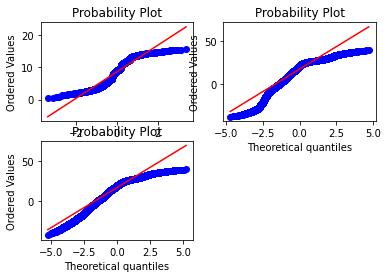

In [23]:
ax1 = plt.subplot(221).set_title('Global Average Temperature')
res = stats.probplot(global_temp['LandAverageTemperature'], plot=plt)
ax2 = plt.subplot(222)
ax2.set_title('Countries Average Temperature')
res = stats.probplot(countries_temp['AverageTemperature'], plot=plt)
ax3 = plt.subplot(223)
ax3.set_title('Cities Average Temperature')
res = stats.probplot(cities_temp['AverageTemperature'], plot=plt)
plt.show()

## Aplicació de proves estadístiques per comparar els grups de dades. 
En funció de les  dades  i  de  l’objectiu  de  l’estudi,  aplicar  proves  de  contrast  d’hipòtesis, correlacions, regressions, etc. Aplicar almenys tres mètodes d’anàlisi diferents.

### Regressió lineal de les dades globals

A continuació es realitzará un estudi de la regressió lineal de les dades del dataset *GlobalTemperatures* centrat en la variable *AverageTemperature*. 

In [24]:
glm_binom = sm.GLM(global_land_average.astype(float), global_temp.astype(float), family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                   Generalized Linear Model Regression Results                    
Dep. Variable:     LandAverageTemperature   No. Observations:                 1992
Model:                                GLM   Df Residuals:                     1983
Model Family:                    Binomial   Df Model:                            8
Link Function:                      logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                    nan
Date:                    Tue, 05 Jan 2021   Deviance:                          inf
Time:                            10:47:27   Pearson chi2:                 6.77e+20
No. Iterations:                         2                                         
Covariance Type:                nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

### Correlació de les dades globals

Aquesta correlació sobre el dataset *GlobalTemperatures* ens permetra observar les relacions entre les variables que el conformen i obtindre una perspectiva més clara de la estructura d'aquest dataset.

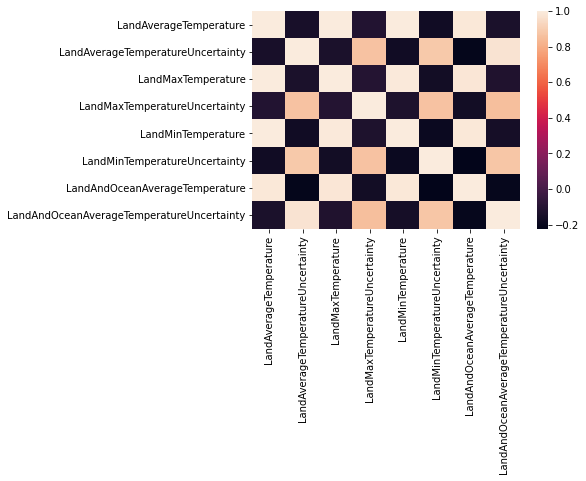

In [25]:
sns.heatmap(global_temp.corr())

Observant el *heatmap* anterior es pot observar, com era d'esperar, que la variable *LandAverageTemperature*, te una forta correlació amb les variables *LandMinAverageTemperature*, *LandMaxAverageTemperature* i *LandAndOceanAverageTemperature*

# Representació dels resultats a partir de taules i gràfiques.

## Evolució de la temperatura segons l'estació de l'any

Una gràfica interesant a observar es tracta de l'evolució de la temperatura en l'aire de la superficie terrestre al llarg dels anys diferencia per estació de l'any, d'aquesta manera es pot observar si l'augment de les temperatures es estacionari o es continu al llarg de l'any.

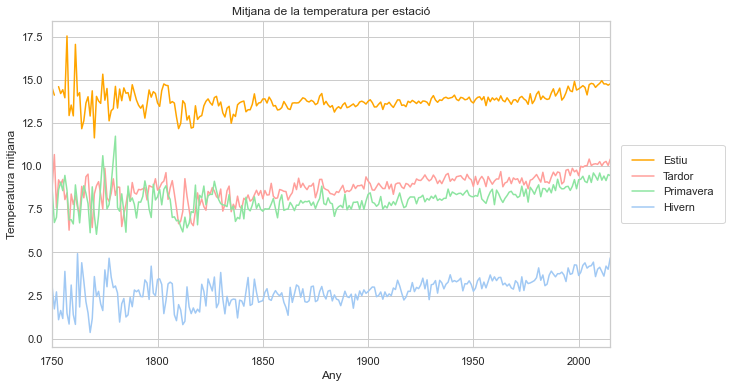

In [26]:
global_temp = pd.read_csv('../data/GlobalTemperatures.csv')
global_temp = global_temp[['dt', 'LandAverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Estiu', color='orange')
plt.plot(years, autumn_temps, label='Tardor', color='r')
plt.plot(years, spring_temps, label='Primavera', color='g')
plt.plot(years, winter_temps, label='Hivern', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Temperatura mitjana')
ax.set_xlabel('Any')
ax.set_title('Mitjana de la temperatura per estació')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)



### Top 10 Paisos mes càlids i més freds

Per obtindre una perspectiva global de les temperatures terrestres, es interesant observar el gràfic on s'observen els 10 paisos més càlids i els més freds dels quals es tenen registres. 

Text(0, 0.5, 'Country')

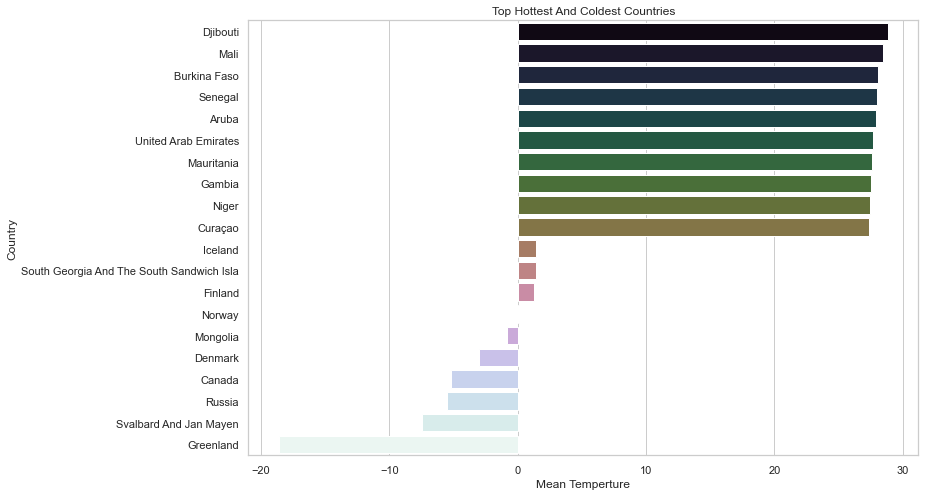

In [27]:
hot=temp_country1.sort_values(by='AverageTemperature',ascending=False)[:10]
cold=temp_country1.sort_values(by='AverageTemperature',ascending=True)[:10]
top_countries=pd.concat([hot,cold])
top_countries.sort_values('AverageTemperature',ascending=False,inplace=True)
f,ax=plt.subplots(figsize=(12,8))
sns.barplot(y='Country',x='AverageTemperature',data=top_countries,palette='cubehelix',ax=ax).set_title('Top Hottest And Coldest Countries')
plt.xlabel('Mean Temperture')
plt.ylabel('Country')

### Evolució de les temperatures en diferents països

A continuació, es visualitzará un gràfic de l'evolució de les temperatures en diferents paisos al llarg dels anys desdel 1850. Això ens permetrà entendre si aquest augment de temperatures ve donat a nivell global o es focalitzat en zones mes industrials o avançades.

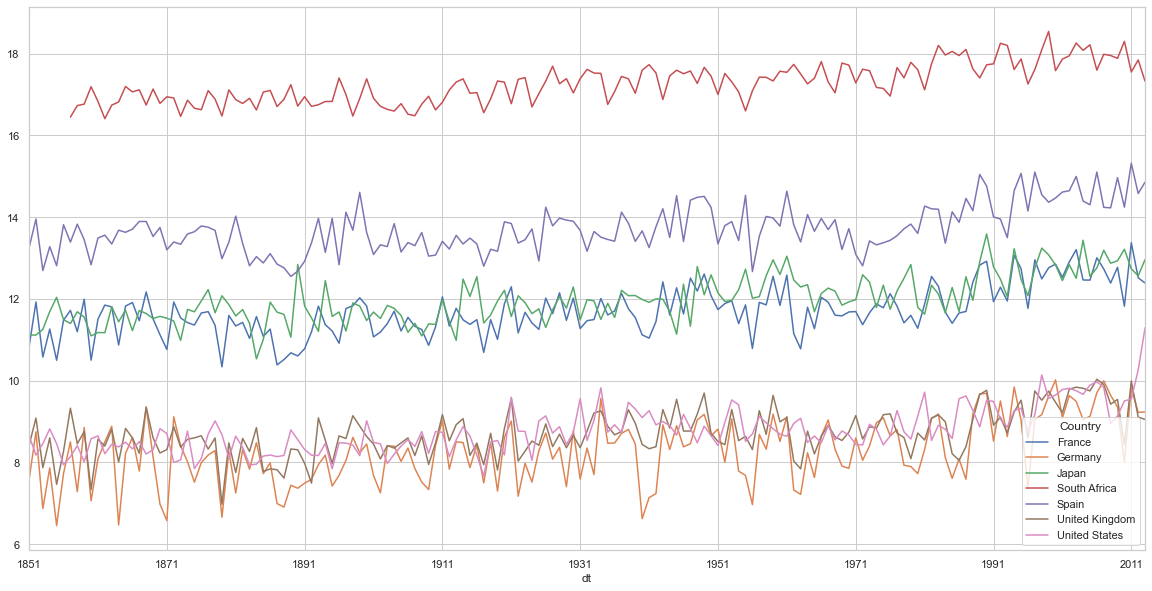

In [28]:
countries=countries_temp.copy()
countries['dt']=pd.to_datetime(countries.dt).dt.strftime('%d/%m/%Y')
countries['dt']=countries['dt'].apply(lambda x: x[6:])
countries=countries[countries['AverageTemperature']!=0]
countries.drop('AverageTemperatureUncertainty',axis=1,inplace=True)
li=['United States','France','Japan','Germany','United Kingdom', 'Spain', 'South Africa']
countries=countries[countries['Country'].isin(li)]
countries=countries.groupby(['Country','dt'])['AverageTemperature'].mean().reset_index()
countries=countries[countries['dt'].astype(int)>1850]
abc=countries.pivot('dt','Country','AverageTemperature')
f,ax=plt.subplots(figsize=(20,10))
abc.plot(ax=ax)

## Evolució de les temperatures a Espanya:

### Durant els ultims 50 anys

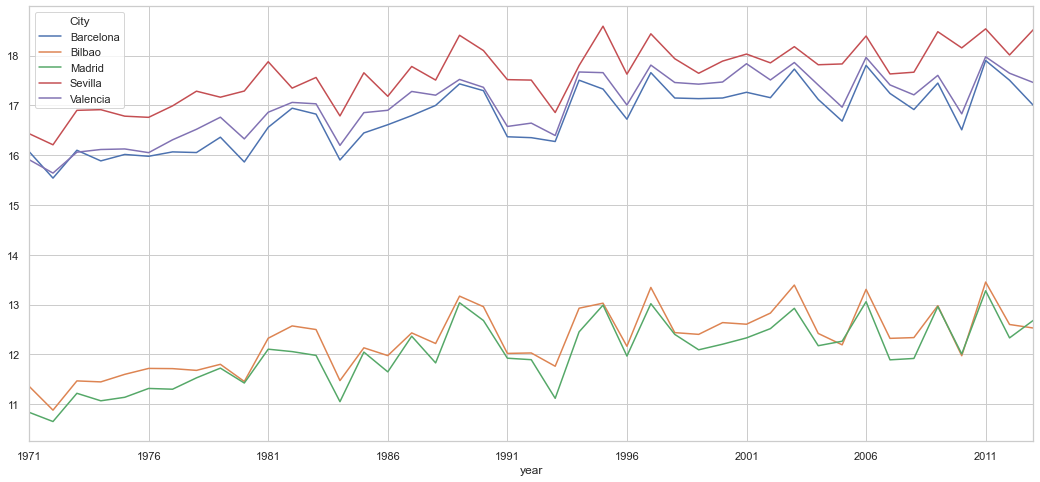

In [29]:
spanish_cities=cities_temp[cities_temp['Country']=='Spain']
spanish_cities=spanish_cities[spanish_cities['year']>'1970']
major_cities=spanish_cities[spanish_cities['City'].isin(['Barcelona','Madrid','Sevilla','Malaga','Bilbao', 'Valencia'])]
graph=major_cities[major_cities['year']>'1970']
graph=graph.groupby(['City','year'])['AverageTemperature'].mean().reset_index()
graph=graph.pivot('year','City','AverageTemperature').fillna(0)
graph.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)

### Durant els ultims 20 anys

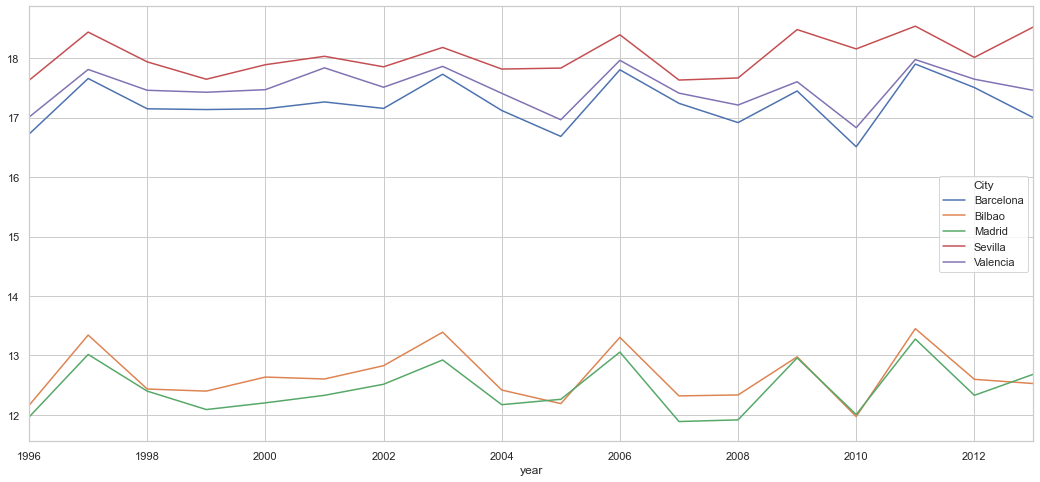

In [30]:
spanish_cities=cities_temp[cities_temp['Country']=='Spain']
spanish_cities=spanish_cities[spanish_cities['year']>'1995']
major_cities=spanish_cities[spanish_cities['City'].isin(['Barcelona','Madrid','Sevilla','Malaga','Bilbao', 'Valencia'])]
graph=major_cities[major_cities['year']>'1995']
graph=graph.groupby(['City','year'])['AverageTemperature'].mean().reset_index()
graph=graph.pivot('year','City','AverageTemperature').fillna(0)
graph.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)

# Resolució del problema. 

A partir dels resultats obtinguts, quines són les conclusions? Els resultats permeten respondre al problema?

## Conclusions

A partir de l'estudi realitzat sobre els diferents datasets que conformen el conjunt de dades sobre les temperatures a l'aire de la superficie de la terra des del 1750 fins al 2015, es pot concloure que en els ultims 50 anys, es troba una tendència **global** d'augment de les temperatures, en aproximadament 2-3 graus globalment, tenint en compte diferents factors que poden fer variar aquest augment, com l'estació de l'any, el pais o la ciutat on s'ha mesurat. 

Per tant els resultat obtinguts han permès respondre al problema plantejat al inici de la pràctica, tot i que no són uns resultats positius per la salut del planeta.